In [2]:
#!/usr/bin/env python

# This script aims to reconstruct features for a event,
# our method is to choose the candidate with highest score.
# The command-line parameters are:
# input_file_name, output_file_name, key

# data processing packages
import sys
import numpy as np
import pandas as pd
from pandas import DataFrame

# plot packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import seaborn as sns
%matplotlib inline

# obtain dataset
input_file_name = './data/fullevent_test.hdf'
key = 'signal'
event = pd.read_hdf(input_file_name, key)

# hypothesis sets
upsmcmass_list = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
Amcmass_list = [0.25, 0.5, 0.75, 1.0, 2.0]
mcmass_list = [[upsmcmass, Amcmass] for upsmcmass in upsmcmass_list for Amcmass in Amcmass_list if upsmcmass>3*Amcmass]

In [3]:
# functions for model evaluation
def evaluate(upsmcmass, Amcmass, threshold=0.5, delta_upsmcmass=0.1, delta_Amcmass=0.1):
    filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
        (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
        (event.A1mcmass < Amcmass + delta_Amcmass) & \
        (event.A1mcmass > Amcmass - delta_Amcmass)
    event_singleMC = event[filt]
    event_without_na = event_singleMC.dropna()
    event_singleMC_pass_threshold = event_singleMC[event_singleMC.cr_score > threshold]

    # return efficiency, purity, selection_efficiency and acceptance
    efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_singleMC.shape[0]
    purity = sum(event_singleMC_pass_threshold.truth_matching==1) * 1.0 / event_singleMC_pass_threshold.shape[0]
    selection_efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_without_na.shape[0]
    acceptance = event_without_na.shape[0] * 1.0 / event_singleMC.shape[0]
    return efficiency, purity, selection_efficiency, acceptance

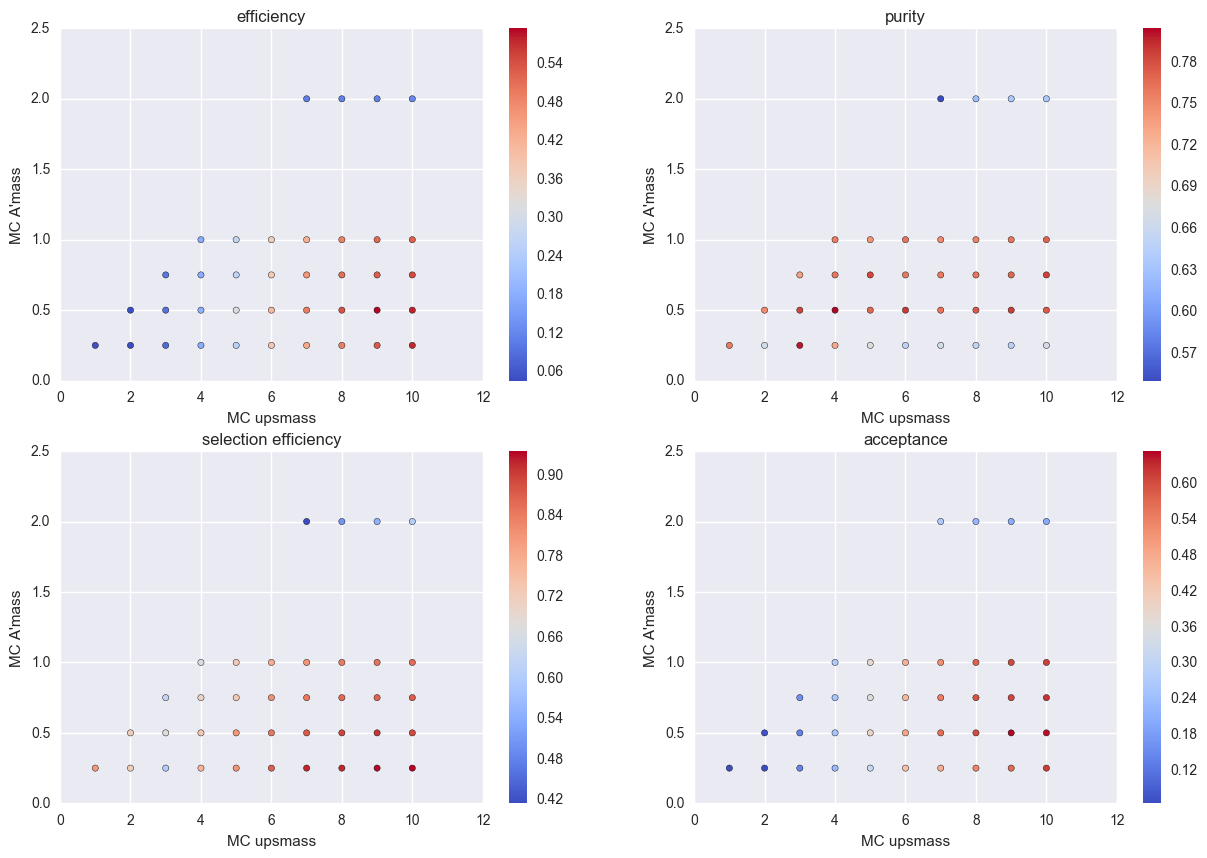

In [7]:
efficiency_list = []
purity_list = []
selection_efficiency_list = []
acceptance_list = []
for upsmcmass_, Amcmass_ in mcmass_list:
    efficiency, purity, selection_efficiency, acceptance = evaluate(upsmcmass_, Amcmass_)
    
    efficiency_list.append(efficiency)
    purity_list.append(purity)
    selection_efficiency_list.append(selection_efficiency)
    acceptance_list.append(acceptance)

fig1 = plt.figure(figsize=(15,10))
mcmass_np = np.array(mcmass_list)

plt.subplot(2,2,1)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=efficiency_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('efficiency')

plt.subplot(2,2,2)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=purity_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('purity')

plt.subplot(2,2,3)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=selection_efficiency_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('selection efficiency')

plt.subplot(2,2,4)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=acceptance_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('acceptance')

In [8]:
efficiency(3,0.5)

(0.09611322348964935,
 0.7846153846153846,
 0.6770833333333334,
 0.14195183776932827)

In [23]:
# MC specific parameters
upsmcmass = 8.
Amcmass = 2.
filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
        (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
        (event.A1mcmass < Amcmass + delta_Amcmass) & \
        (event.A1mcmass > Amcmass - delta_Amcmass)
event_singleMC = event[filt]
event_singleMC_pass_threshold = event_singleMC[event_singleMC.cr_score > threshold]
print event_singleMC_pass_threshold.shape[0] * 1.0 / event_singleMC.shape[0]

0.115303094532


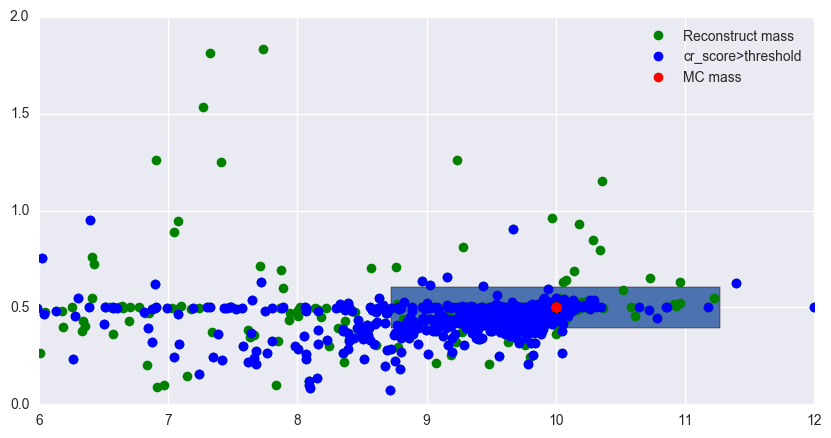

In [21]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
plt.plot(event_singleMC.upsmass, event_singleMC.A1mass, 'o', color='g', label='Reconstruct mass')
plt.plot(event_singleMC_pass_threshold.upsmass, event_singleMC_pass_threshold.A1mass,
         'o', color='b', label='cr_score>threshold')
plt.plot(event_singleMC.upsmcmass, event_singleMC.A1mcmass, 'o', color='r', label='MC mass')

ax1.add_patch(
            patches.Rectangle(
                (upsmcmass - box_upsmass, Amcmass - box_Amass),
                box_upsmass * 2,
                box_Amass * 2,))
plt.xlim([6,12])
plt.ylim([0,2])
plt.legend()